In [1]:
import sys
sys.path.append("PREP/")
from utils import *
from analyzer import *
from plot_utils import *
from line_method import *

In [3]:
df,polygons_dic , polygons_dic_scaled,lines = load_and_analyze_polyongs_from_images(polygons_path,images_path_rgb_only,images_path_org, to_plot = False)
df2 =  analyze_the_lines(df,lines,polygons_dic)

k1sample_40X_NP_Exp1_0012
k1sample_40X_NP_Exp1_0012
k1sample_40X_NP_Exp1_0013
k1sample_40X_NP_Exp1_0014
k1sample_40X_NP_Exp1_0014
k1sample_40X_NP_Exp1_0016
k1sample_40X_NP_Exp1_0017
k1sample_40X_NP_Exp1_0018
k1sample_40X_NP_Exp1_0018
k1sample_40X_NP_Exp1_001
k1sample_40X_NP_Exp1_0020
k1sample_40X_NP_Exp1_0021
k1sample_40X_NP_Exp1_0021
k1sample_40X_NP_Exp1_0022
k1sample_40X_NP_Exp1_0022
k1sample_40X_NP_Exp1_0024
k1sample_40X_NP_Exp1_0025
k1sample_40X_NP_Exp1_0025
k1sample_40X_NP_Exp1_0025
k1sample_40X_NP_Exp1_0025
k1sample_40X_NP_Exp1_0026
k1sample_40X_NP_Exp1_0027
k1sample_40X_NP_Exp1_0027
k1sample_40X_NP_Exp1_0028
k1sample_40X_NP_Exp1_0028
k1sample_40X_NP_Exp1_0029
k1sample_40X_NP_Exp1_0029
k1sample_40X_NP_Exp1_002
k1sample_40X_NP_Exp1_0030
k1sample_40X_NP_Exp1_0033
k1sample_40X_NP_Exp1_0034
k1sample_40X_NP_Exp1_0035
k1sample_40X_NP_Exp1_0036
k1sample_40X_NP_Exp1_0036
k1sample_40X_NP_Exp1_0037
k1sample_40X_NP_Exp1_0038
k1sample_40X_NP_Exp1_0038
k1sample_40X_NP_Exp1_0038
k1sample_40X_N

In [5]:
df3, cell_binary_images_reshaped,nuc_binary_images_reshaped = prep_binary_images(df2,polygons_dic_scaled, 
                                                                                 rupt_min = 0.003, 
                                                                                 non_rupt_max = 0.002, 
                                                                                 desired_dim = 62)
np.save('VAE/data/cells.npy', cell_binary_images_reshaped)
np.save('VAE/data/nucs.npy', nuc_binary_images_reshaped)
df3.to_csv('VAE/data/df.csv', index=False)

In [6]:
for i in sorted(df3['sample_name'].unique()):
    df5= df3[df3['sample_name']==i]
    print(i, df5['ruptured_man'].mean())

df4 = df3.copy()
ind = df4.sort_values('mse_diff').index
nuc_polys = [polygons_dic[(i,'nuc_not_scaled')] for i in  ind]
cell_polys = [polygons_dic[(i,'cell')] for i in  ind]

Exp1 0.7125
Exp2 0.16129032258064516
Exp3 0.1320754716981132
Exp4 0.3619631901840491
Exp5 0.38235294117647056
Exp6 0.1568627450980392
Exp7 0.43478260869565216


0 / 722
k1sample_40X_NP_Exp1_0017 5.0156933692264095e-06
(2048, 2448, 3)


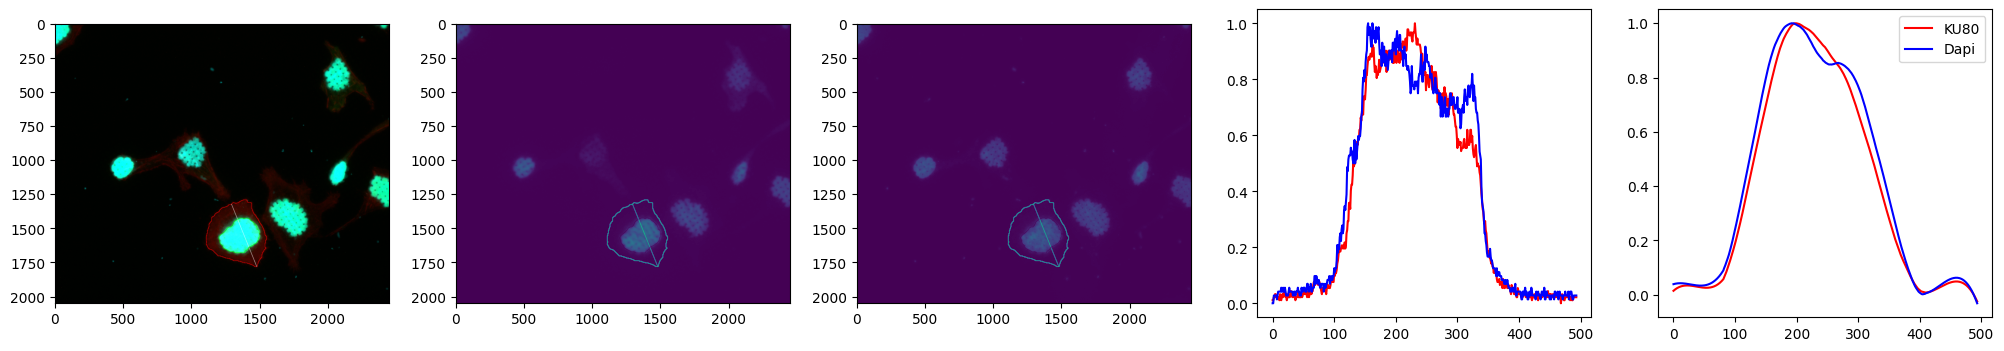

1 / 722
k1sample_40X_NP_Exp1_001 1.0780814084379184e-05
(2048, 2448, 3)


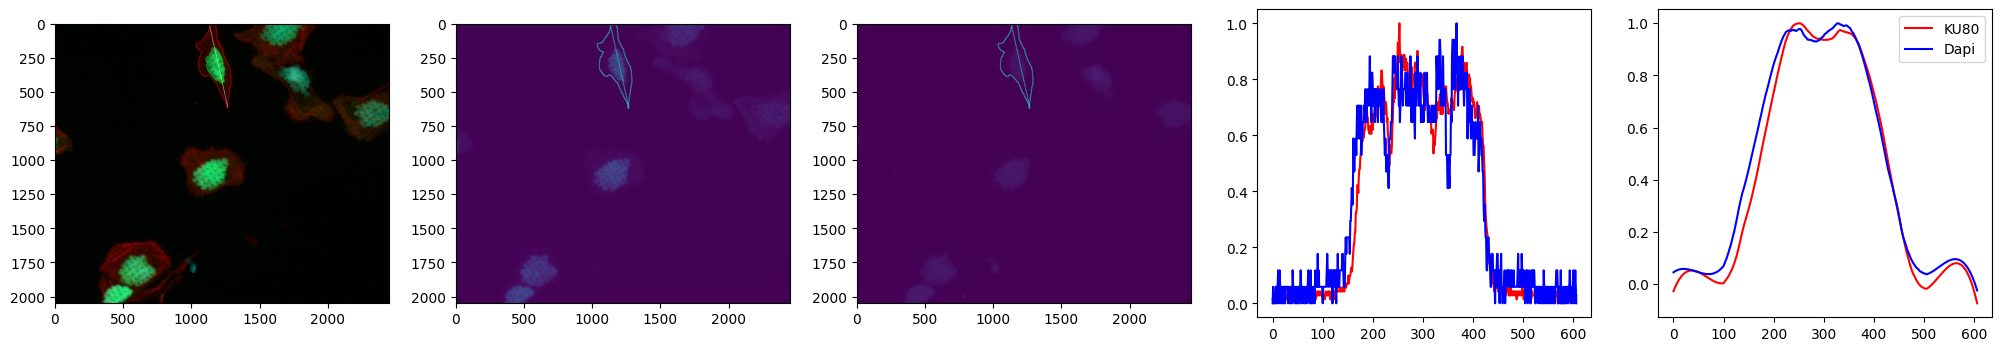

2 / 722
k1sample_40X_NP_Exp4_035 1.7730321020572786e-05
(2048, 2448, 3)


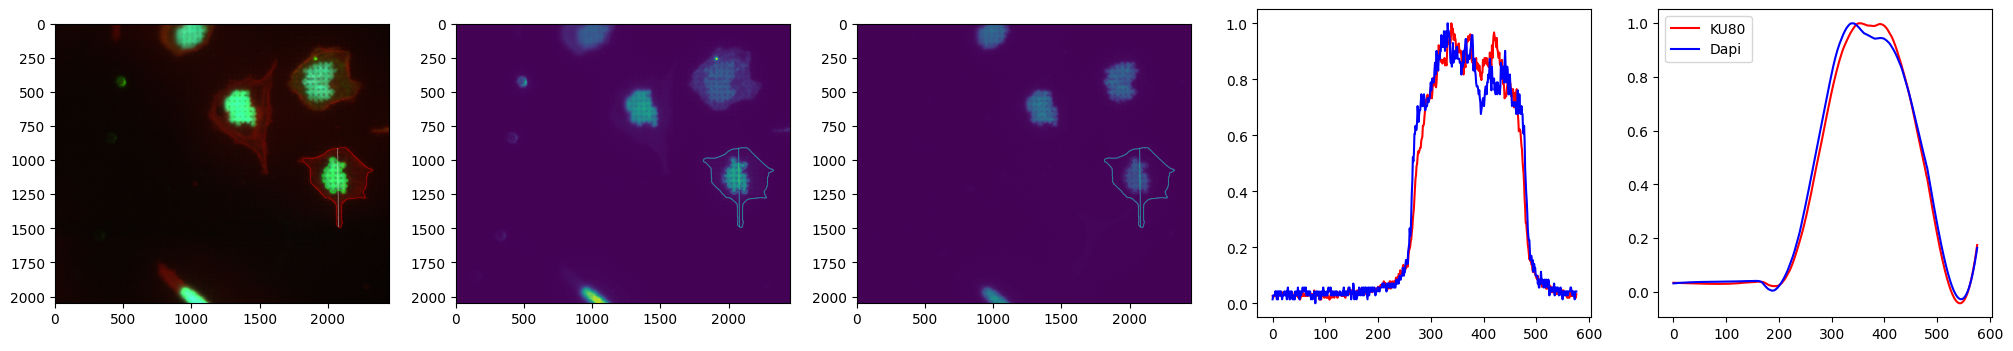

3 / 722
k1sample_40X_NP_Exp1_0022 1.9017987181293007e-05
(2048, 2448, 3)


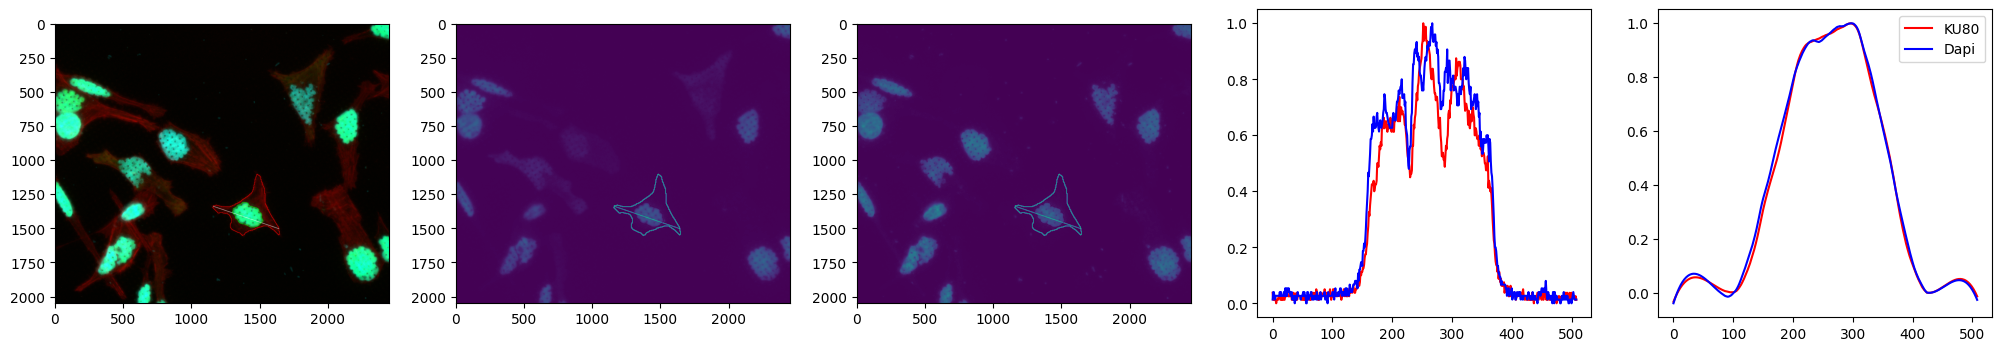

4 / 722
k1sample_40X_NP_Exp1_0025 2.6279809245572293e-05
(2048, 2448, 3)


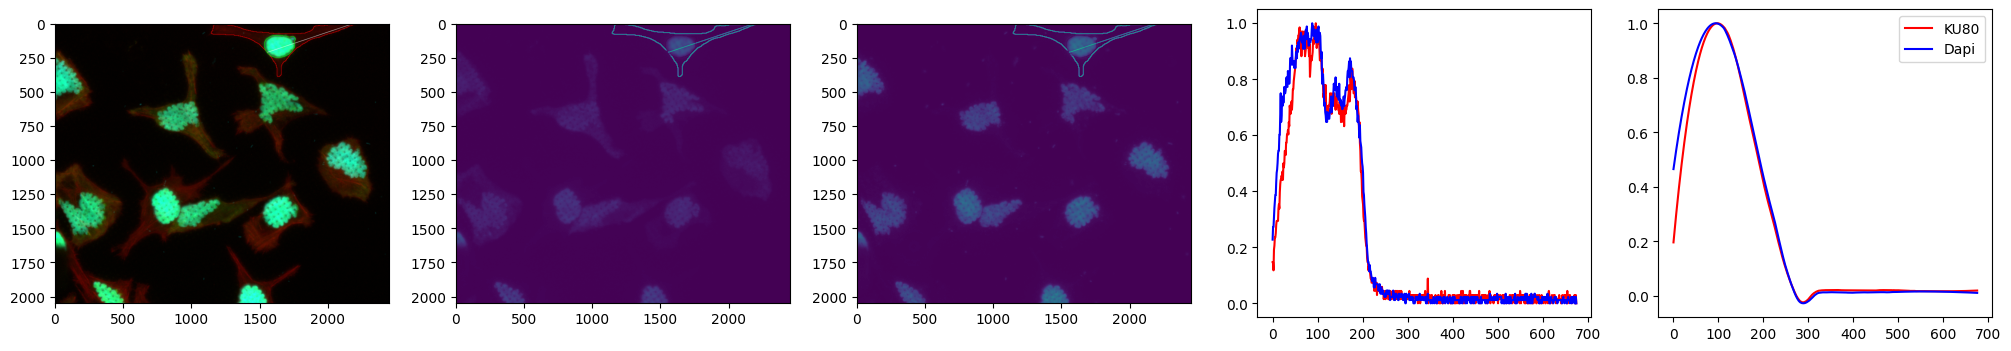

5 / 722
k1sample_40X_NP_Exp5_31 3.6804719135203916e-05
(2048, 2448, 3)


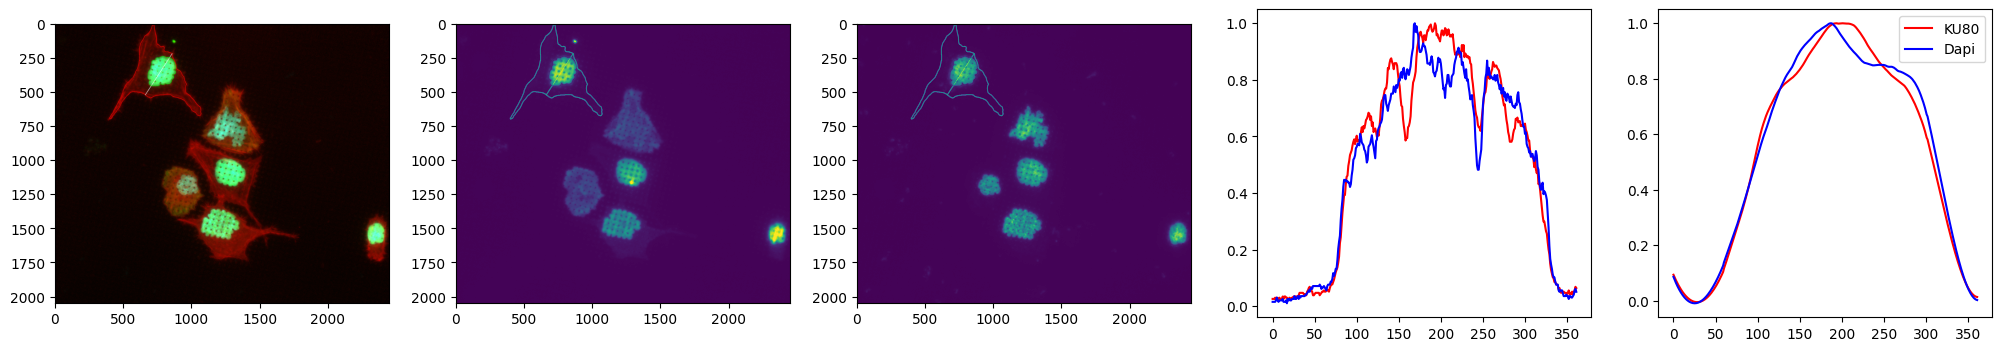

6 / 722
k1sample_40X_NP_Exp1_0037 4.638555249626878e-05
(2048, 2448, 3)



KeyboardInterrupt



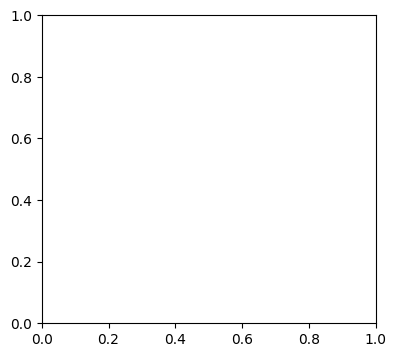

In [7]:
## RUN TO SEE THE PLOTS

for counter, n in  enumerate (ind):
    print(counter, '/', len(ind))
    name = df4.loc[n,'image_name']
    kl_val = df4.loc[n,'mse_diff']
    print(name,kl_val)
    longest_line,x, zi, x_inside, zi_inside = lines[(n,'ku80')]
    longest_line,x_nuc, zi_nuc, x_inside_nuc, zi_inside_nuc= lines[(n,'dapi')]
    nuc =  polygons_dic[(n,'nuc')]
    window_length = int(len(zi)/3)
    poly_order = 3
    zi_filtered = savgol_filter(zi, window_length, poly_order)
    zi_nuc_filtered = savgol_filter(zi_nuc, window_length, poly_order)
    a1 = zi_filtered/np.max(zi_filtered)
    a2 = zi_nuc_filtered/np.max(zi_nuc_filtered)
    image1 = load_image(name+'_RGB', images_path_rgb_only)
    print(image1.shape)
    image2 = load_image(name+'_Merge', images_path_org)    
    nuc_poly = Polygon(polygons_dic[(n,'nuc_not_scaled')])
    cell_poly = Polygon(polygons_dic[(n,'cell')])
    fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 4))  # Adjust figsize to fit your needs
    plot_seg_and_line_axis(axs[0],image2, cell_poly,nuc_poly, longest_line)
    plot_seg_and_line_axis(axs[1],image1[:,:,1], cell_poly,nuc_poly, longest_line)
    plot_seg_and_line_axis(axs[2],image1[:,:,2], cell_poly,nuc_poly, longest_line)
    axs[3].plot(zi/np.max(zi), color = 'red', label ='KU80') 
    axs[3].plot(zi_nuc/np.max(zi_nuc), color = 'blue', label ='Dapi')
    
    axs[4].plot(a1, color = 'red', label ='KU80') 
    axs[4].plot(a2, color = 'blue', label ='Dapi')
    plt.legend()
    plt.show()


/tmp/ipykernel_2814/2938387968.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4[col].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_2814/1749496307.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_2814/1749496307.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Non-Ruptured", "Ru

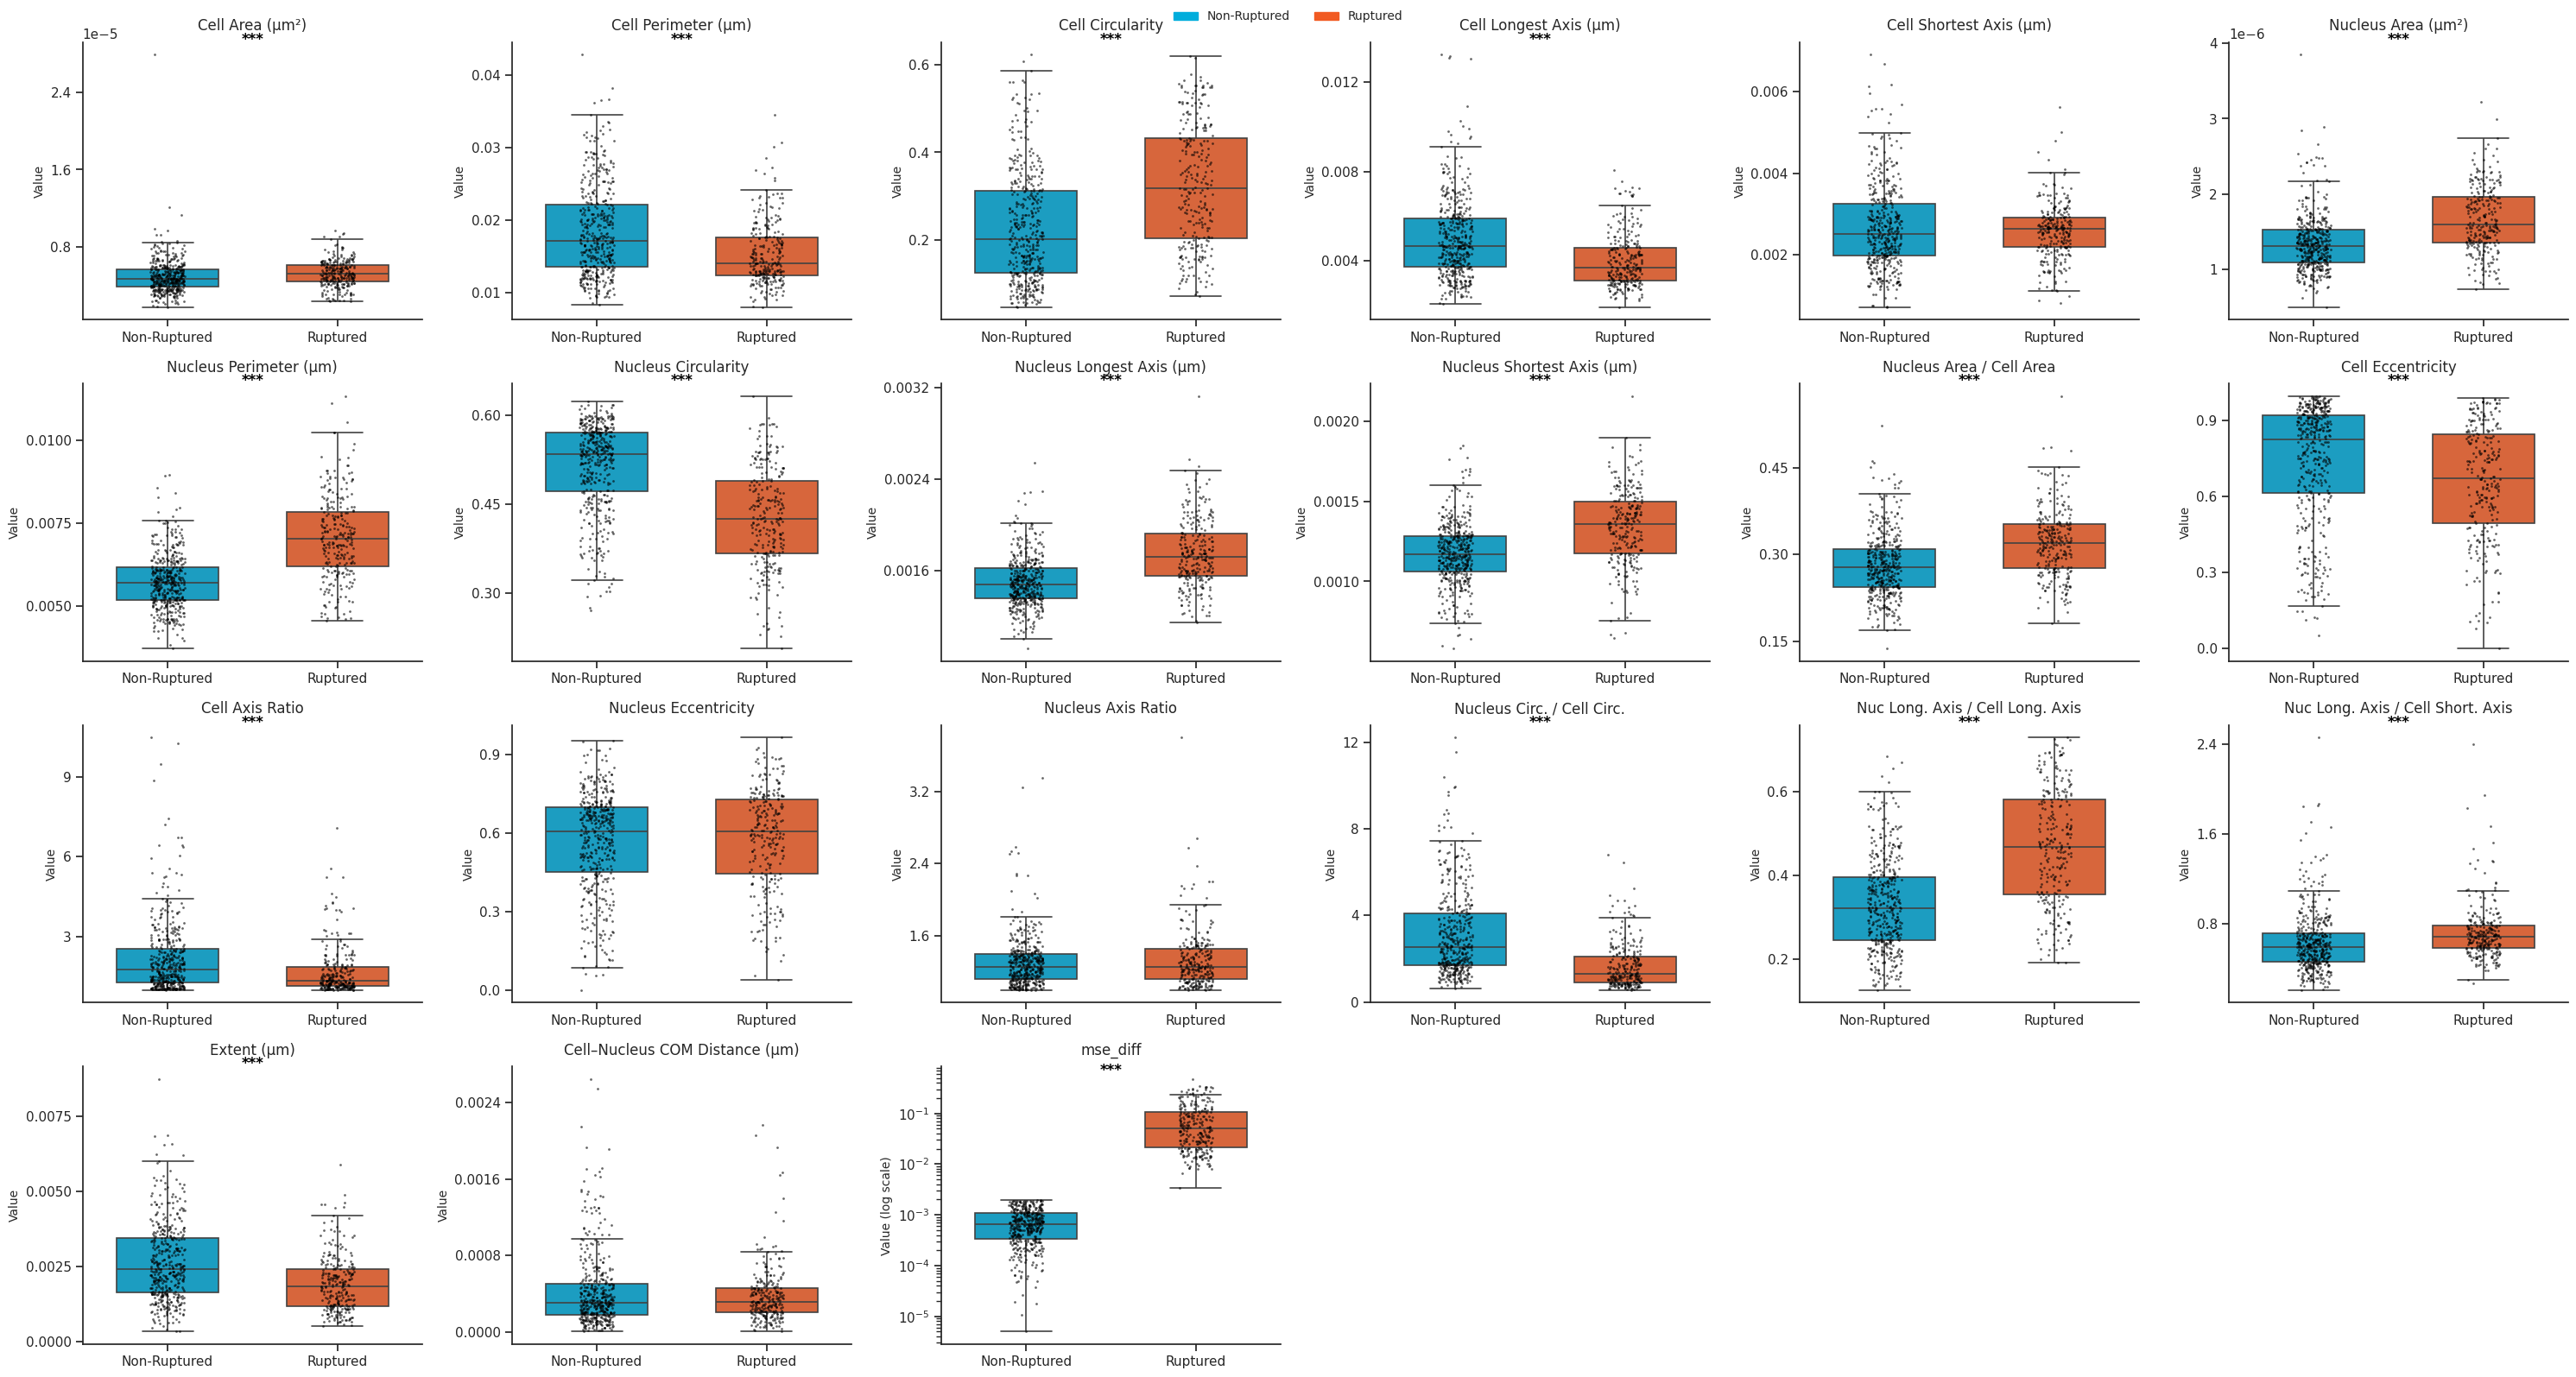

/tmp/ipykernel_2814/1749496307.py:187: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(
/tmp/ipykernel_2814/1749496307.py:208: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_2814/1749496307.py:187: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(
/tmp/ipykernel_2814/1749496307.py:208: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_2814/1749496307.py:187: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(
/tmp/ipykern

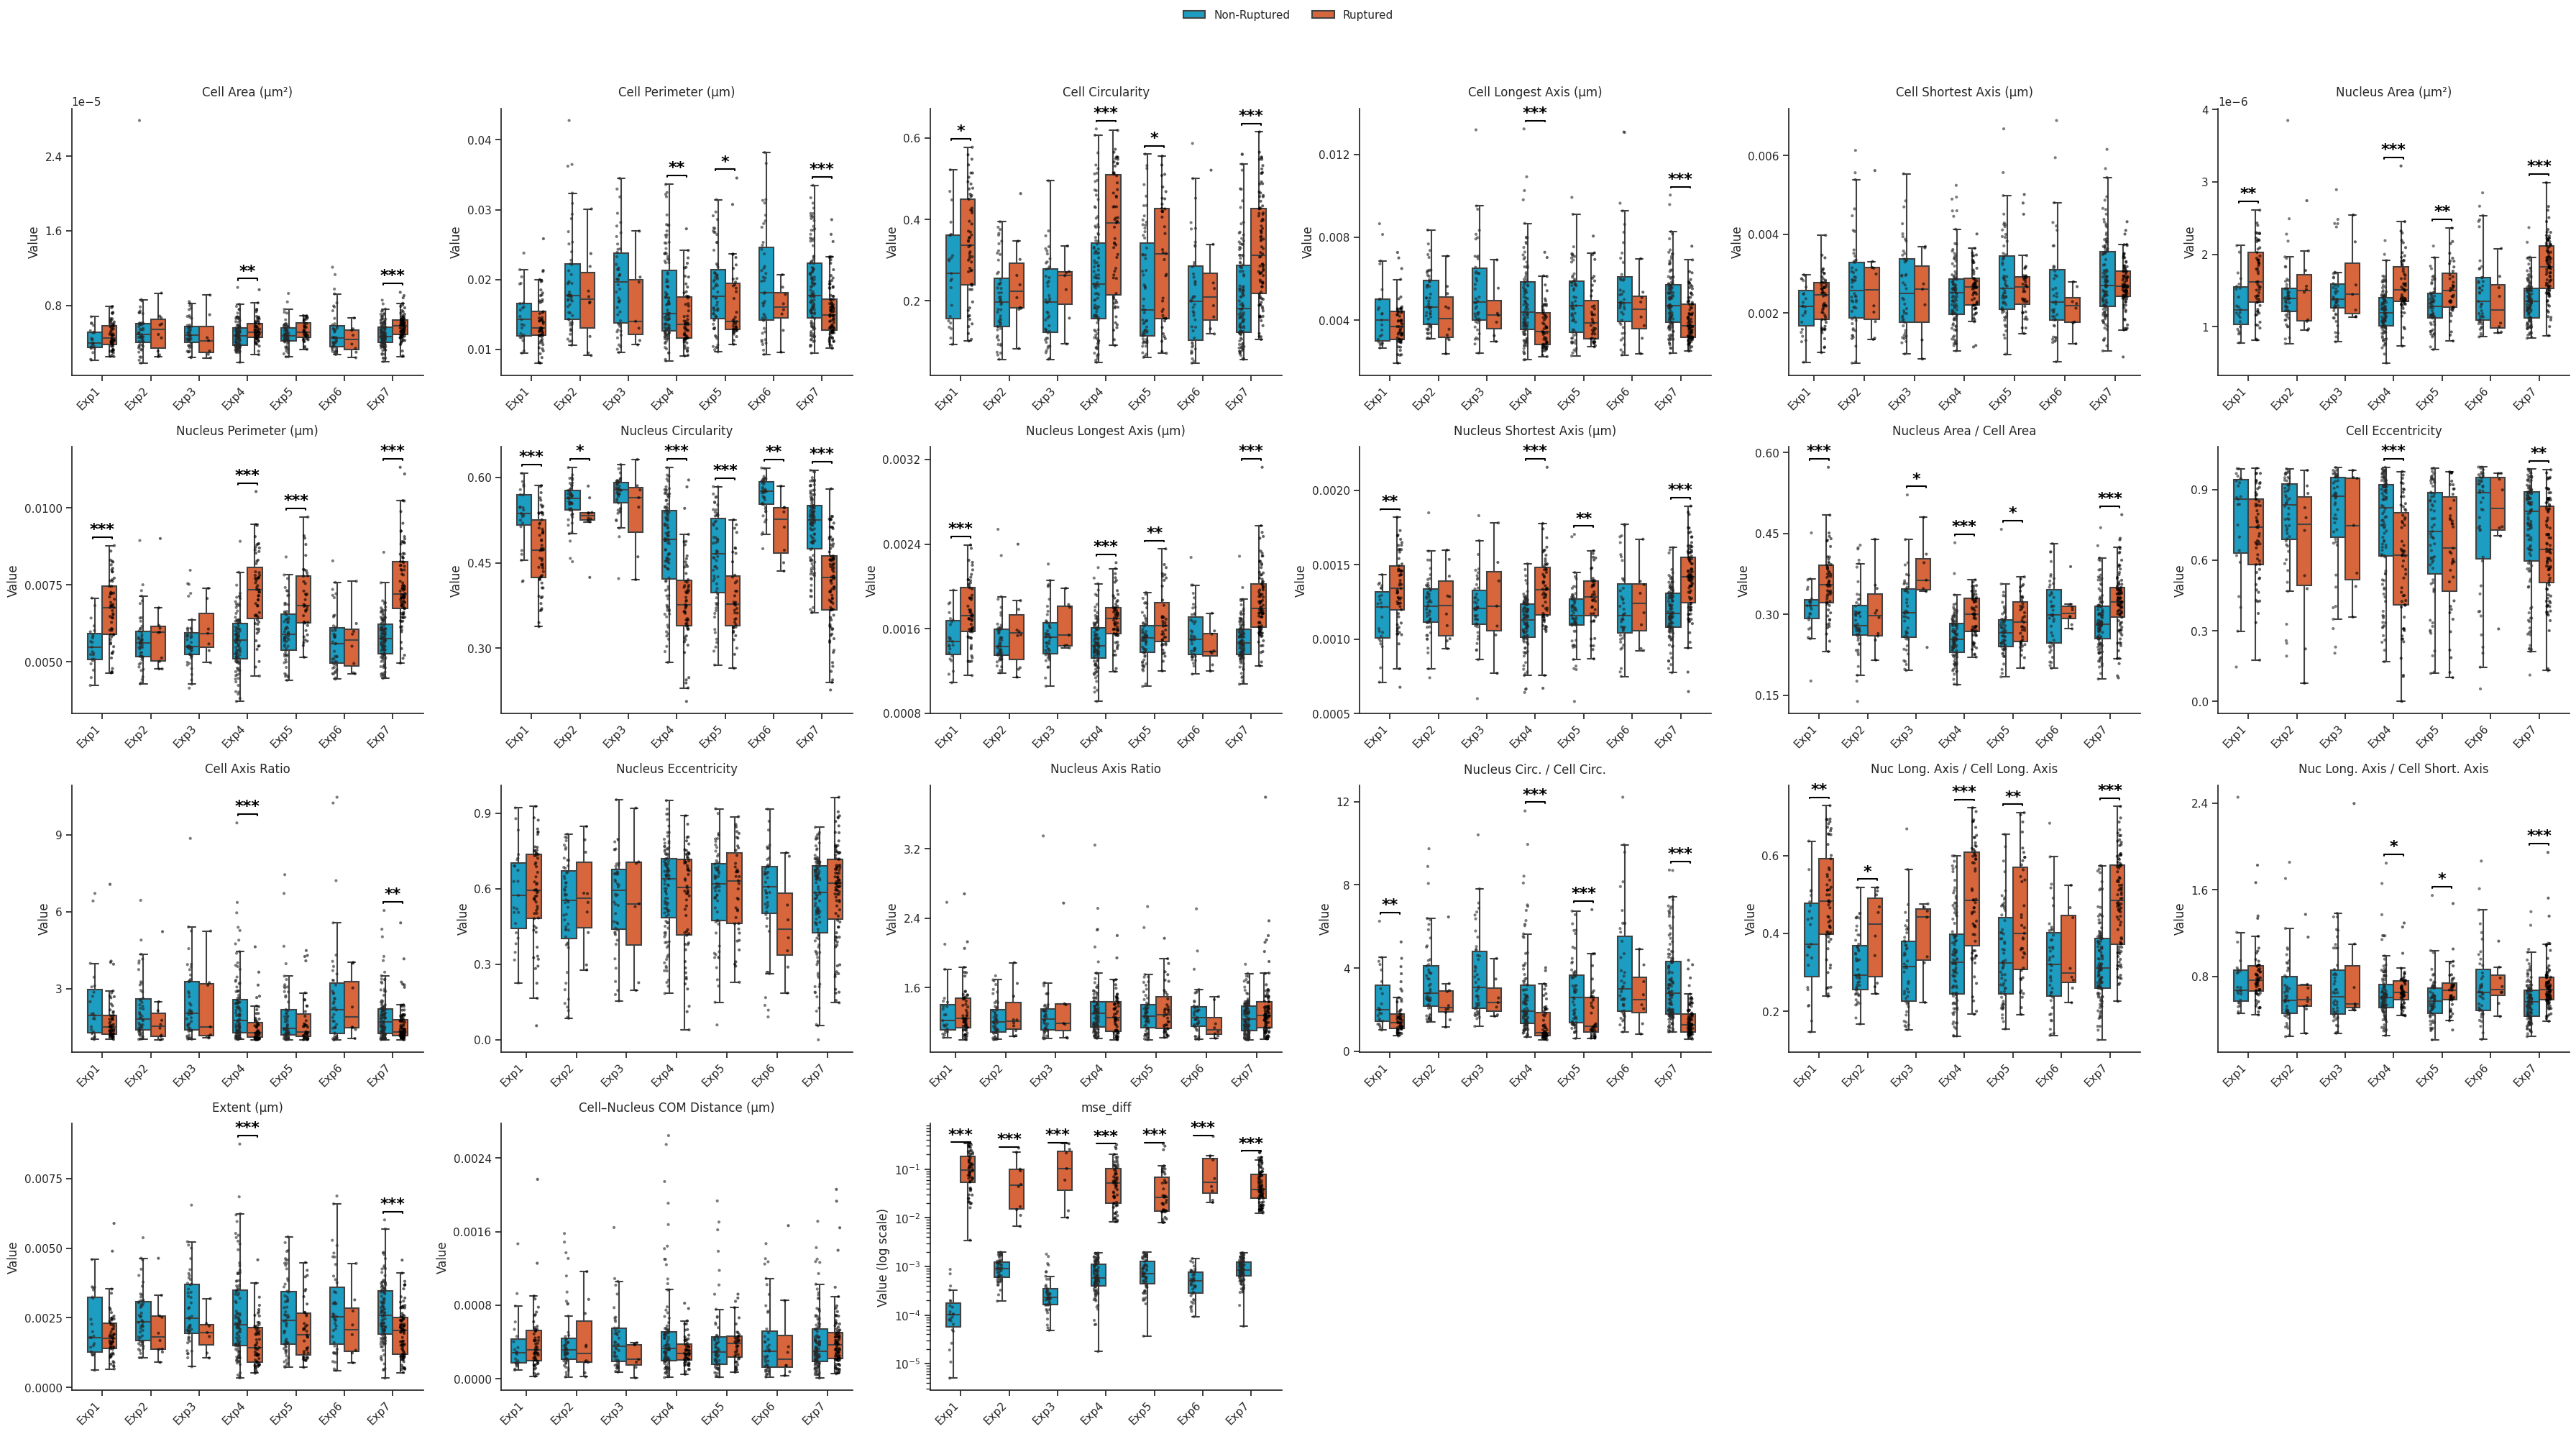

In [17]:
# Convert length-based features from pixels to micrometers
df4[length_columns] = df4[length_columns] * PIXEL_TO_MICROMETER
# Convert area-based features from pixels² to micrometers²
df4[area_columns] = df4[area_columns] * AREA_CONVERSION
# Orientation difference, absolute value and clipped between -90 and +90
df4['orientation_diff'] = np.abs(df4['cell_ellipse_orientation'] - df4['nuc_ellipse_orientation']).clip(-90, 90)
# Ratio features (remain unitless)
df4['nuc_area_per_cell_area'] = df4['nuc_area'] / df4['cell_area']
df4['nuc_circularity_per_cell_circularity'] = df4['nuc_circularity'] / df4['cell_circularity']
df4['nuc_longest_axis_per_cell_longest_axis'] = df4['nuc_longest_axis'] / df4['cell_longest_axis']
df4['nuc_longest_axis_per_cell_shortest_axis'] = df4['nuc_longest_axis'] / df4['cell_shortest_axis']
for col in ratio_columns:
    df4[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    
plot_overall_rupture_significance(df4,features_toplot)
plot_per_experiment_significance(df4,features_toplot)